# Predict product yield from a mock validation
## Introduction:

In solution DEL library is generated with careful testing to look at the synthetic yield of each building block before incorparting into the actual library. This notebook is to examine how the library size and the synthetic yield affect the final library yield

In [2]:
# import the library
import pandas as pd
import numpy as np
import scipy.stats as stats

import ipywidgets as widgets
from ipywidgets import interact

import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mean, median

from itertools import product

plt.style.use('ggplot')

### I am a visual person (aka, not very good at statistic). This little widget allows me to visualize what the yield profile looks like given an average yield and a number of building block in a single cycle. It generates a set of building blocks and randomly select a yield based on a normal distribution.

bb_size=building block number;
ave_yield= average synthetic yield
cutoff= the lower yield limit where it is acceptable to go into DEL production
yield_max = maximum yield of the reaction
spread = distribution of building block yield 

In [3]:
def plot_yield_profile(bb_size=100, ave_yield=90, cutoff=10, yield_max=100, spread=50):
    bb_yield=stats.truncnorm.rvs((cutoff-ave_yield)/spread, (yield_max-ave_yield)/spread, loc=ave_yield, scale=spread, size=bb_size)
    bb_yield.sort()
    Y=list(bb_yield)
    X=list(range(1,bb_size+1))
    data=pd.DataFrame({'X':X,'Y':Y})
    fig, ax=plt.subplots(figsize=(20,10))
    barplot=sns.barplot(x='X', y='Y', data=data)
    barplot.set_xlabel('Building Block',fontsize=30)
    barplot.set_ylabel('Synthetic Yield', fontsize=30)
    barplot.tick_params(labelsize=20)
    ax.tick_params(labelbottom=False)
    plt.show()
interact(plot_yield_profile,bb_size=(10,200,10), ave_yield=(10, 100, 10), cutoff=(10,90,5), yield_max= (0,100,10), spread=(10, 50, 10))

interactive(children=(IntSlider(value=100, description='bb_size', max=200, min=10, step=10), IntSlider(value=9…

<function __main__.plot_yield_profile(bb_size=100, ave_yield=90, cutoff=10, yield_max=100, spread=50)>

### There are a few assumptions made here:
1. There are only three reaction steps (three cycle library, no deprotection steps etc.)
2. There is no loss of material during each step
3. The library pool contains equal-mole of each library member

Obviously, this is a perfect senario and very unrealistic in the actual DEL production. However, for this exercise, this should suffice

The next step is doing a combinatorial multiplication based on reaction yield and number of building blcok of each step to see what percent of the final mix is the actual 3 cycle product

Library size: 125000
bb1: size 50, aveage yield 50, cutoff yield 10, maximum yield 100, yield spread 21
bb2: size 50, aveage yield 50, cutoff yield 10, maximum yield 100, yield spread 21
bb3: size 50, aveage yield 50, cutoff yield 10, maximum yield 100, yield spread 21
Percent of 3-cycle full ligand in the mix: 14.0%
Median yield of 3 cycle ligands: 11.0%


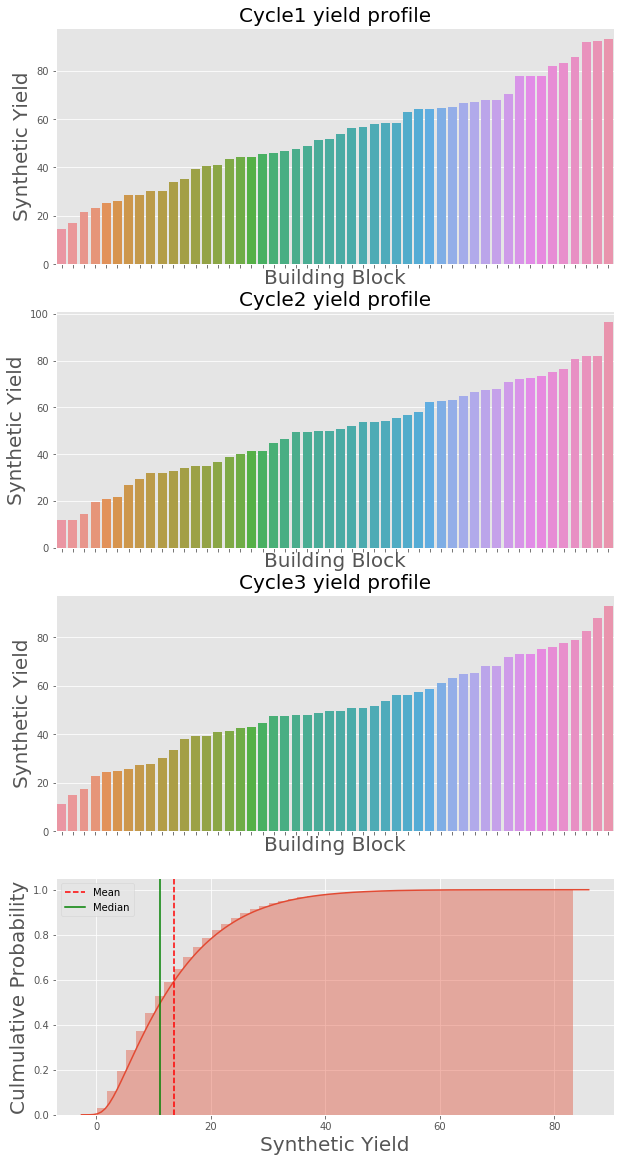

Library size: 125000
bb1: size 50, aveage yield 90, cutoff yield 50, maximum yield 100, yield spread 21
bb2: size 50, aveage yield 50, cutoff yield 10, maximum yield 100, yield spread 21
bb3: size 50, aveage yield 50, cutoff yield 10, maximum yield 100, yield spread 21
Percent of 3-cycle full ligand in the mix: 21.0%
Median yield of 3 cycle ligands: 19.0%


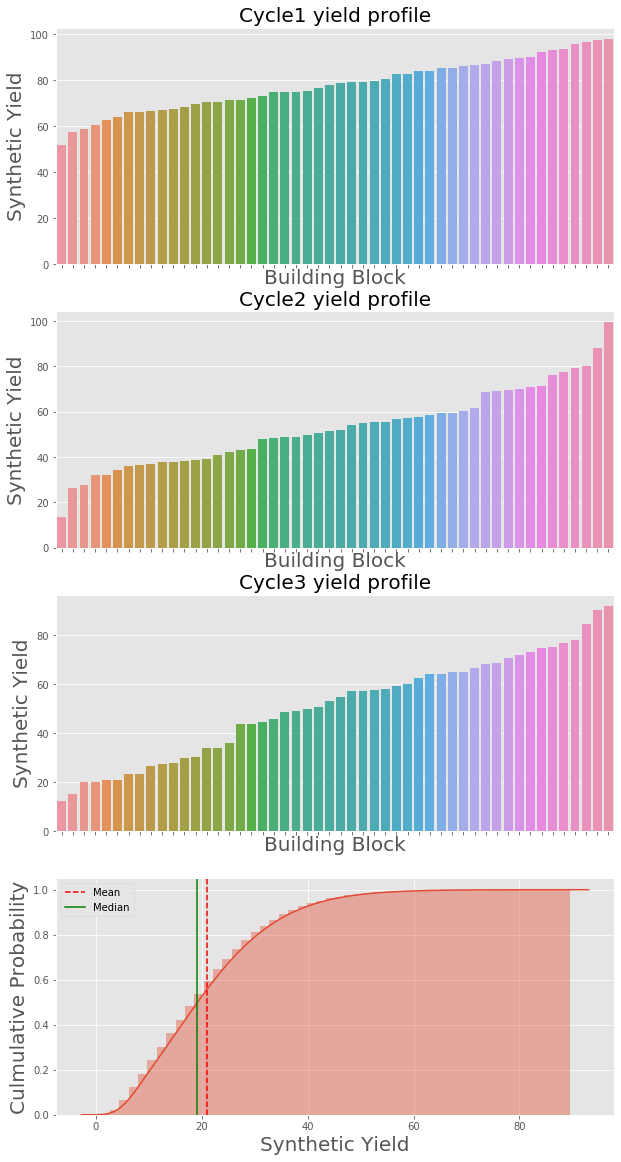

Library size: 125000
bb1: size 50, aveage yield 50, cutoff yield 50, maximum yield 100, yield spread 21
bb2: size 50, aveage yield 50, cutoff yield 50, maximum yield 100, yield spread 21
bb3: size 50, aveage yield 50, cutoff yield 50, maximum yield 100, yield spread 21
Percent of 3-cycle full ligand in the mix: 30.0%
Median yield of 3 cycle ligands: 28.0%


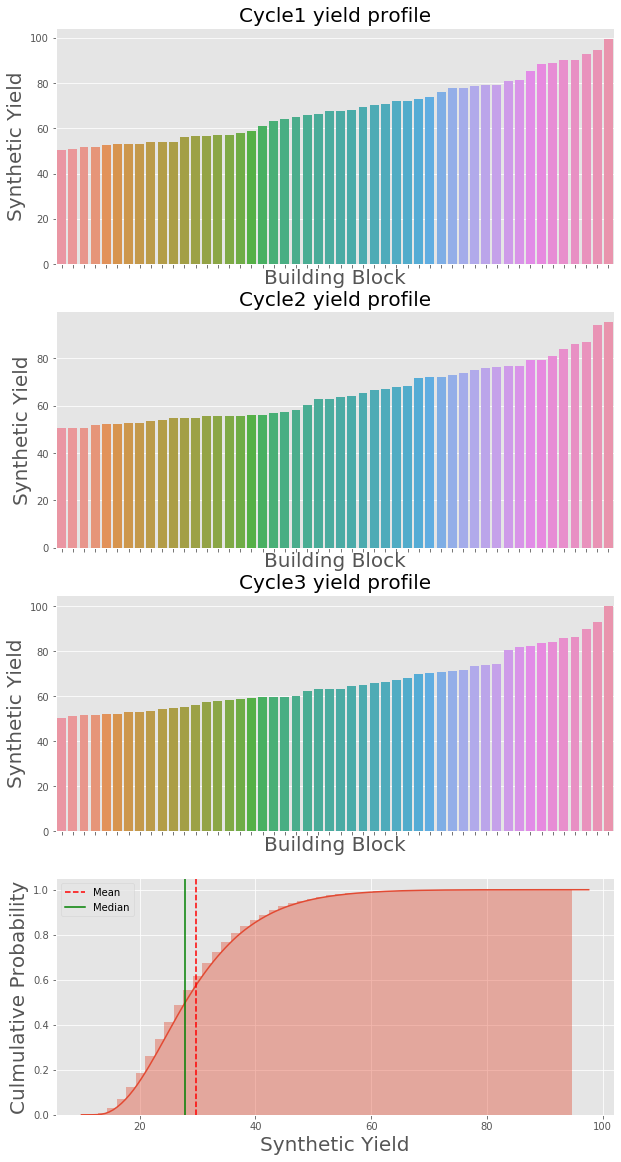

In [30]:
style={'description_width': 'initial'}
bb1_size_slider=widgets.IntSlider(value=50, min=10, max=200, step=10, description='bb1_size')
bb2_size_slider=widgets.IntSlider(value=50, min=10, max=200, step=10, description='bb2_size')
bb3_size_slider=widgets.IntSlider(value=50, min=10, max=200, step=10, description='bb3_size')
bb1_ave_yield_slider=widgets.IntSlider(value=50, min=10, max=100, step=10, description='bb1_ave_yield', style=style)
bb2_ave_yield_slider=widgets.IntSlider(value=50, min=10, max=100, step=10, description='bb2_ave_yield', style=style)
bb3_ave_yield_slider=widgets.IntSlider(value=50, min=10, max=100, step=10, description='bb3_ave_yield', style=style)
bb1_cutoff_slider=widgets.IntSlider(value=10, min=10, max=100, step=10, description='bb1_cutoff')
bb2_cutoff_slider=widgets.IntSlider(value=10, min=10, max=100, step=10, description='bb2_cutoff')
bb3_cutoff_slider=widgets.IntSlider(value=10, min=10, max=100, step=10, description='bb3_cutoff')
bb1_max_slider=widgets.IntSlider(value=100, min=10, max=100, step=10, description='bb1_max')
bb2_max_slider=widgets.IntSlider(value=100, min=10, max=100, step=10, description='bb2_max')
bb3_max_slider=widgets.IntSlider(value=100, min=10, max=100, step=10, description='bb3_max')
bb1_spread_slider=widgets.IntSlider(value=21, min=1, max=51, step=10, description='bb1_spread')
bb2_spread_slider=widgets.IntSlider(value=21, min=1, max=51, step=10, description='bb2_spread')
bb3_spread_slider=widgets.IntSlider(value=21, min=1, max=51, step=10, description='bb3_spread')

def plot_library_yield(bb1_size_slider, bb1_ave_yield_slider, bb1_cutoff_slider, bb1_max_slider, bb1_spread_slider, bb2_size_slider, bb2_ave_yield_slider, bb2_cutoff_slider, bb2_max_slider, bb2_spread_slider, bb3_size_slider, bb3_ave_yield_slider, bb3_cutoff_slider, bb3_max_slider, bb3_spread_slider):
    
    """
    Plot the desired 3 cycle ligand distribution, the parameters are all supplied as a widgets in jupyter notebook
    
    parameters:
    size: number of building blocks in the library at each cycle
    ave_yield: average yield of the chemical transformation at each cycle
    cutoff: the lower yield limit where the building block is accpeted to be in the library
    max: the maximum yield limit where the building block is accpeted to be in the library (for poorly performing chemical reactions)
    spread: the distribution of the yield at for each building block
    
    """
    # setting up the parameters based on the sliders
    bb1_size=bb1_size_slider.value
    bb2_size=bb2_size_slider.value
    bb3_size=bb3_size_slider.value
    bb1_ave_yield=bb1_ave_yield_slider.value
    bb2_ave_yield=bb2_ave_yield_slider.value
    bb3_ave_yield=bb3_ave_yield_slider.value
    bb1_cutoff=bb1_cutoff_slider.value
    bb2_cutoff=bb2_cutoff_slider.value
    bb3_cutoff=bb3_cutoff_slider.value
    bb1_max=bb1_max_slider.value
    bb2_max=bb2_max_slider.value
    bb3_max=bb3_max_slider.value
    bb1_spread=bb1_spread_slider.value
    bb2_spread=bb2_spread_slider.value
    bb3_spread=bb3_spread_slider.value
    
    # Generate a set of bb with different yield at each cycle based on a statistical distribution
    cyc1_yield=stats.truncnorm.rvs((bb1_cutoff-bb1_ave_yield)/bb1_spread, (bb1_max-bb1_ave_yield)/bb1_spread, loc=bb1_ave_yield, scale=bb1_spread, size=bb1_size)
    cyc1_yield.sort()
    cyc1_df=pd.DataFrame({'cyc1_yield':cyc1_yield})
    cyc1_df.reset_index(inplace=True)
    
    cyc2_yield=stats.truncnorm.rvs((bb2_cutoff-bb2_ave_yield)/bb2_spread, (bb2_max-bb2_ave_yield)/bb2_spread, loc=bb2_ave_yield, scale=bb2_spread, size=bb2_size)
    cyc2_yield.sort()
    cyc2_df=pd.DataFrame({'cyc2_yield':cyc2_yield})
    cyc2_df.reset_index(inplace=True)
    
    cyc3_yield=stats.truncnorm.rvs((bb3_cutoff-bb3_ave_yield)/bb3_spread, (bb3_max-bb3_ave_yield)/bb3_spread, loc=bb3_ave_yield, scale=bb3_spread, size=bb3_size)
    cyc3_yield.sort()
    cyc3_df=pd.DataFrame({'cyc3_yield':cyc3_yield})
    cyc3_df.reset_index(inplace=True)
    
    # Combining the 3 cycle to get a yield profile of the library
    cyc12=[a*b/100 for a, b in product(cyc1_yield, cyc2_yield)]
    cyc123=[a*b/100 for a, b in product(cyc12, cyc3_yield)]

    Y=list(cyc123)
    
    # plotting the results
    fig, ax=plt.subplots(nrows=4, figsize=(10,20))
    
    ax[0]=sns.barplot(x='index', y='cyc1_yield', data=cyc1_df, ax=ax[0])
    ax[0].set_xlabel('Building Block',fontsize=20)
    ax[0].set_ylabel('Synthetic Yield', fontsize=20)
    ax[0].set_title('Cycle1 yield profile', fontsize=20)
    ax[0].tick_params(labelbottom=False)
        
    ax[1]=sns.barplot(x='index', y='cyc2_yield', data=cyc2_df, ax=ax[1])
    ax[1].set_xlabel('Building Block',fontsize=20)
    ax[1].set_ylabel('Synthetic Yield', fontsize=20)
    ax[1].set_title('Cycle2 yield profile', fontsize=20)
    ax[1].tick_params(labelbottom=False)    
    
    ax[2]=sns.barplot(x='index', y='cyc3_yield', data=cyc3_df, ax=ax[2])
    ax[2].set_xlabel('Building Block',fontsize=20)
    ax[2].set_ylabel('Synthetic Yield', fontsize=20)
    ax[2].set_title('Cycle3 yield profile', fontsize=20)
    ax[2].tick_params(labelbottom=False)  
    

    ax[3]=sns.distplot(Y, ax=ax[3], hist_kws={'cumulative': True, 'density': True}, kde_kws={'cumulative': True})
    ax[3].set_xlabel('Synthetic Yield',fontsize=20)
    ax[3].set_ylabel('Culmulative Probability', fontsize=20)
    ax[3].tick_params(labelsize=10)
    yield_mean=mean(cyc123)
    yield_median=median(cyc123)
    ax[3].axvline(yield_mean, color='r', linestyle='--')
    ax[3].axvline(yield_median, color='g', linestyle='-')
    ax[3].legend({'Mean':yield_mean,'Median':yield_median})
    
    
    print("Library size: {}".format(len(cyc123)))
    print ("bb1: size {}, average yield {}, cutoff yield {}, maximum yield {}, yield spread {}".format(bb1_size, bb1_ave_yield, bb1_cutoff, bb1_max, bb1_spread))
    print ("bb2: size {}, average yield {}, cutoff yield {}, maximum yield {}, yield spread {}".format(bb2_size, bb2_ave_yield, bb2_cutoff, bb2_max, bb2_spread))
    print ("bb3: size {}, average yield {}, cutoff yield {}, maximum yield {}, yield spread {}".format(bb3_size, bb3_ave_yield, bb3_cutoff, bb3_max, bb3_spread))
    print("Percent of 3-cycle full ligand in the mix: {}%".format(round(sum(cyc123)/len(cyc123))))
#     print("Average yield of 3 cycle ligands: {}%".format(round(yield_mean)))
    print("Median yield of 3 cycle ligand: {}%".format(round(yield_median)))
    

# setting up the widgets
size=widgets.HBox([bb1_size_slider, bb2_size_slider, bb3_size_slider])
ave_yield=widgets.HBox([bb1_ave_yield_slider, bb2_ave_yield_slider, bb3_ave_yield_slider])
cutoff=widgets.HBox([bb1_cutoff_slider, bb2_cutoff_slider, bb3_cutoff_slider])
max_yield=widgets.HBox([bb1_max_slider, bb2_max_slider, bb3_max_slider])
spread=widgets.HBox([bb1_spread_slider, bb2_spread_slider, bb3_spread_slider])
button = widgets.Button(description='Plot')

all_widgets=widgets.VBox([size, ave_yield, cutoff, max_yield, spread, button])


display(all_widgets)

def on_button_clicked(b):
    plot_library_yield(bb1_size_slider, bb1_ave_yield_slider, bb1_cutoff_slider, bb1_max_slider, bb1_spread_slider, bb2_size_slider, bb2_ave_yield_slider, bb2_cutoff_slider, bb2_max_slider, bb2_spread_slider, bb3_size_slider, bb3_ave_yield_slider, bb3_cutoff_slider, bb3_max_slider, bb3_spread_slider)
    
button.on_click(on_button_clicked)

# About the distribution

I have chosen the truncated normal distribution here to accomdate the maximum and minimum cutoff so that the readers can cater the use based on the reaction of thier choice. I have also considered using a skewed distribution as well because sometimes a normal distribution might not be sufficient.

[(1, 100)]

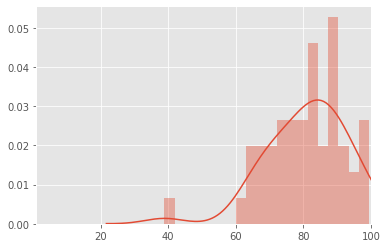

In [34]:
cutoff=10
ave_yield=90
spread=20
yield_max=100
size=50


test=stats.truncnorm.rvs((cutoff-ave_yield)/spread, (yield_max-ave_yield)/spread, loc=ave_yield, scale=spread, size=size)

plot=sns.distplot(test,bins=20)
plot.set(xlim=(1,100))

# about the spread parameter

Changing the spread might allow the user to pick a profile more closer resemble the reactions of interest

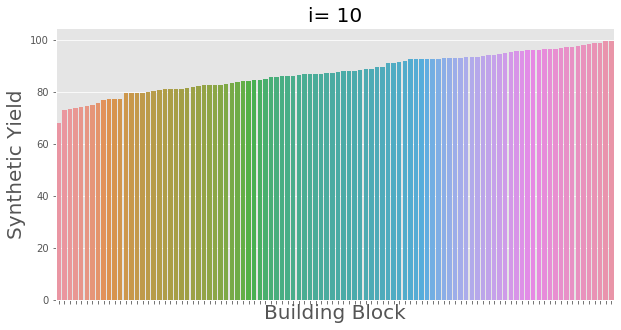

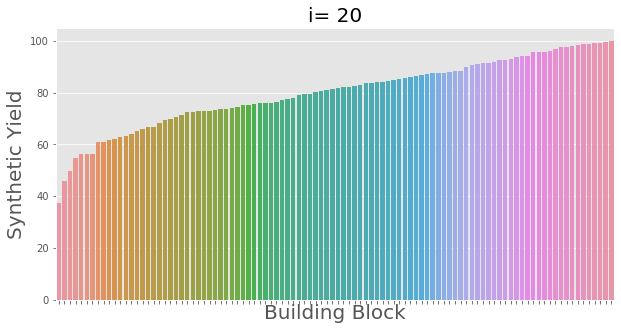

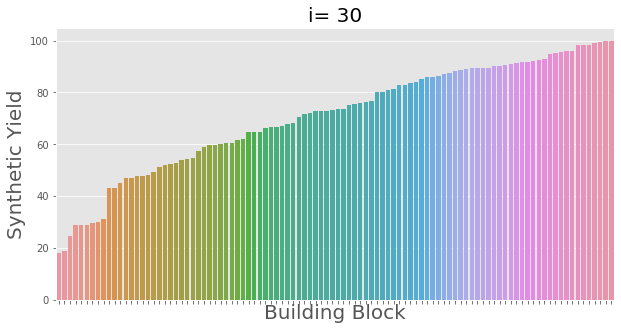

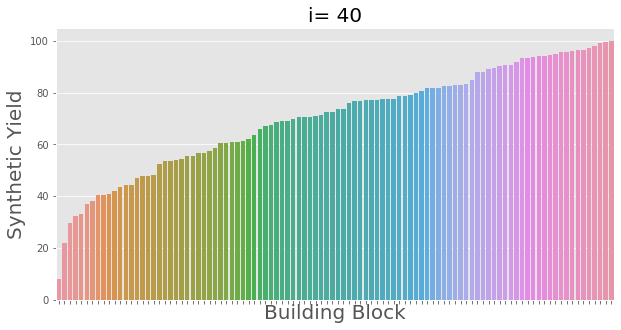

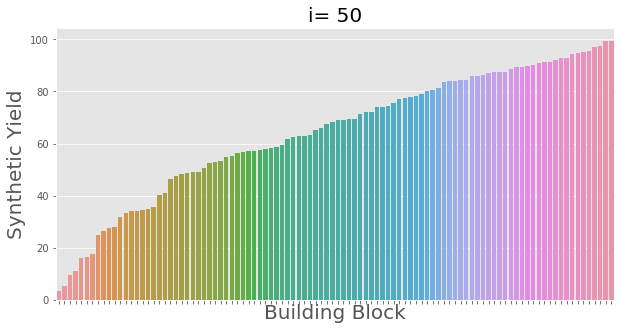

In [5]:
#Assume that the synthesis yield follow a normal distribution and we will pick random numbers based on the average yield
interact(bb=5, ave_yield=90)
lower, upper=0, 100
ave_yield= 90
#by changing the scale parameter, one can change the spread of the yield, we will visualize how the parameter change the spread here by changing i
for i in range(10,51,10):
    bb_yield=stats.truncnorm.rvs((lower-ave_yield)/i, (upper-ave_yield)/i, loc=ave_yield, scale=i, size=100)
    bb_yield.sort()
    Y=list(bb_yield)
    X=list(range(1,101))
    data=pd.DataFrame({'X':X,'Y':Y})
    fig, ax=plt.subplots(figsize=(10,5))
    barplot=sns.barplot(x='X', y='Y', data=data)
    barplot.set_xlabel('Building Block',fontsize=20)
    barplot.set_ylabel('Synthetic Yield', fontsize=20)
    barplot.set_title ("i= " + str(i), fontsize=20)
    barplot.tick_params(labelsize=10)
    ax.tick_params(labelbottom=False)
    plt.show()

